In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/pulsar_data_train.csv')
df=pd.DataFrame(df)

In [ ]:
df.columns =['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness','DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,10793.00,12528.00,12528.00,11350.00,12528.00,11903.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,1.06,6.21,29.61,19.61,4.54,107.40,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.02,-0.19,1.91,14.40,5.80,35.20,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.34,10.73,140.00,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


In [ ]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [ ]:
df.dropna(subset = ["IP Kurtosis"], inplace=True)
df.dropna(subset = ["DM-SNR Skewness"], inplace=True)
df.dropna(subset=['DM-SNR Sd'],inplace=True)
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [ ]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 0)
X_train.shape, X_test.shape
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head(5)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,0.164798,0.907948,-0.032971,-0.269461,-0.313497,-0.405422,-0.220249,-0.374169
1,0.743130,-0.177942,-0.490658,-0.286519,-0.306883,-0.262643,-0.166121,-0.386149
2,0.606714,-0.760029,-0.186538,-0.083582,-0.377819,-0.714923,0.972838,0.913185
3,-0.254433,0.320053,-0.257150,-0.251679,-0.325306,-0.368962,-0.008550,-0.263124
4,0.303936,0.845016,-0.500837,-0.339807,-0.412308,-0.902511,3.430210,4.940553


Text(0, 0.5, 'DM-SNR Skewness')

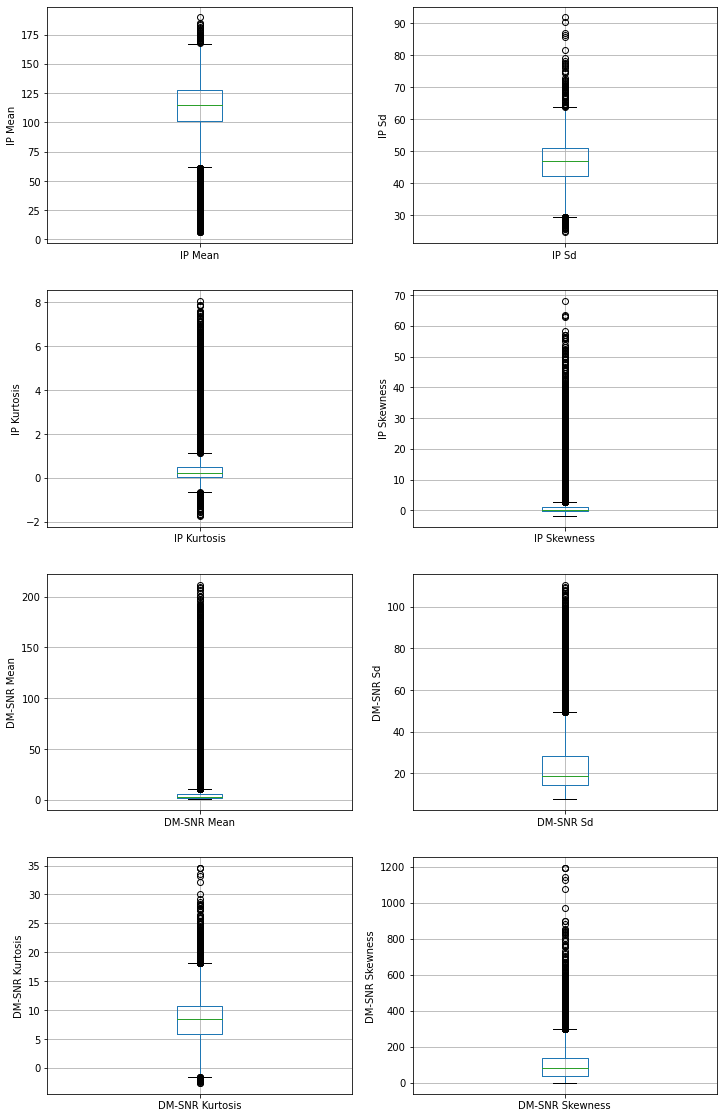

In [ ]:
plt.figure(figsize=(12,20))
plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')
plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')
plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')
plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')
plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')
plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')
plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')
plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf and C=100.0: {0:0.4f}'.
format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf and C=100.0: 0.9763


In [ ]:
y_pred_train = svc.predict(X_train)
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'.
format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9848


In [ ]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9848
Test set score: 0.9763


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1672   12]
 [  32  139]]

True Positives(TP) =  1672

True Negatives(TN) =  139

False Positives(FP) =  12

False Negatives(FN) =  32


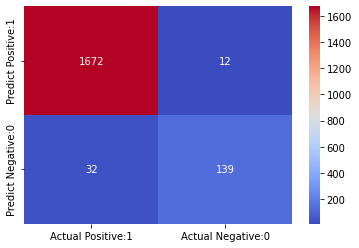

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
poly_svc=SVC(kernel='poly', C=100.0)
poly_svc.fit(X_train, y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=100.0 :{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 :0.9725


In [ ]:
y_pred_train = poly_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.
format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9810


In [ ]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9848
Test set score: 0.9763


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1670   14]
 [  37  134]]

True Positives(TP) =  1670

True Negatives(TN) =  134

False Positives(FP) =  14

False Negatives(FN) =  37


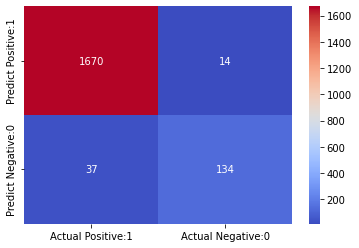

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')